# **Programming for Applied Deep Learning (GKSG008-01)**
> ### **20181202 김수미**
> ### MNIST Experiment(2) (Based on 11/4 Lecture)

> ### **4-1. Set the number of epochs to 100.**

**1. Import Libraries and Define Functions**

In [ ]:
pip install d2l

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.utils.data as data
import cv2

import warnings
warnings.filterwarnings('ignore')

from d2l.torch import *
from torch import nn
from d2l import torch as d2l
from torch.utils.data import DataLoader

In [ ]:
def load_data_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
      trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.MNIST(root="../data",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.MNIST(root="../data",train=False,transform=trans,download=True)
    return(data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=4),
           data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=4))

In [ ]:
def my_train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc
    print("Final train loss : {:.4f}".format(train_loss))

**2. Load Dataset and Define Parameters**

In [ ]:
batch_size = 256
train_iter, test_iter = load_data_mnist(batch_size)

**3. Define Model**

In [ ]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights);

**4. Train the Model : Set my own parameters**

Final train loss : 0.2542


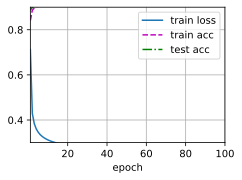

In [ ]:
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

num_epochs = 100 # takes about 11 min
my_train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

**5. Training Result**

In [ ]:
# Test Accuracy
for x,y in test_iter:
  pred = net(x)
  test_pred = torch.argmax(pred, dim=1)
  break

result = (y == test_pred)
accuracy = result.sum()/len(result)
print('>> Test Accuracy : ',accuracy.item()*100,'%')

# Train Accuracy
for x,y in train_iter:
  pred = net(x)
  train_pred = torch.argmax(pred, dim=1)
  break

result = (y == train_pred)
accuracy = result.sum()/len(result)
print('>> Train Accuracy : ',accuracy.item()*100,'%')

>> Test Accuracy :  94.53125 %
>> Train Accuracy :  94.53125 %


> ### **4-2. you may increase or decrease it as long as the result is good, which is your own decision.**

**1. Set my own parameters (takes about 8 min)**

Final train loss : 0.2396


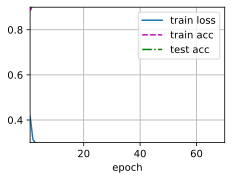

In [ ]:
# Batch size : 128 / Learning rate : 0.4 / Epochs : 70
batch_size = 128
train_iter, test_iter = load_data_mnist(batch_size)

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights);

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.4)

num_epochs = 70
my_train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

**2. Train Results**

In [ ]:
# Test Accuracy
for x,y in test_iter:
  pred = net(x)
  test_pred = torch.argmax(pred, dim=1)
  break

result = (y == test_pred)
accuracy = result.sum()/len(result)
print('>> Test Accuracy : ',accuracy.item()*100,'%')

# Train Accuracy
for x,y in train_iter:
  pred = net(x)
  train_pred = torch.argmax(pred, dim=1)
  break

result = (y == train_pred)
accuracy = result.sum()/len(result)
print('>> Train Accuracy : ',accuracy.item()*100,'%')

>> Test Accuracy :  96.09375 %
>> Train Accuracy :  95.3125 %


> ### **5. Make your own image (28x28) mimicking an MNIST data (they are handwritten digits), give it to the network trained, and insist that your network is good.**

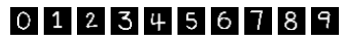

In [ ]:
# Load my handwritting data
my_nums = []
my_labs = [0,1,2,3,4,5,6,7,8,9]
imgs = []
for i in range(10):
  img = cv2.imread('{num}.jpg'.format(num=i),cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (28,28))
  imgs.append(img)
  img = np.reshape(img,(1,28,28))
  my_nums.append(img)
  
my_nums = np.array(my_nums)
my_nums = torch.Tensor(my_nums)
my_labs = np.array(my_labs)
my_labs = torch.Tensor(my_labs)

# Plot my data images
fig = plt.figure()
rows,cols = 1,10
for i in range(10):
  ax1 = fig.add_subplot(rows, cols, i+1)
  ax1.imshow(imgs[i], cmap='gray')
  ax1.axis("off")
plt.show()

In [ ]:
# My Data Accuracy
pred = net(my_nums)
my_pred = torch.argmax(pred, dim=1)

result = (my_labs == my_pred)
accuracy = result.sum()/len(result)
arr = my_labs.detach().numpy()
arr = arr.astype('int32')

print('< True Label >',arr)
print('\n< Prediction >',my_pred.detach().numpy())
print('\n>> My Data Accuracy : ',accuracy.item()*100,'%')

< True Label > [0 1 2 3 4 5 6 7 8 9]

< Prediction > [0 1 2 3 9 8 6 3 9 9]

>> My Data Accuracy :  60.00000238418579 %
